In [28]:
import csv
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [29]:
df_test = pd.read_csv("BankDataFinal_test.csv")
df_train = pd.read_csv("BankDataFinal_train.csv")

In [32]:
df_train.head()

,Unnamed: 0,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,tue,wed,thu,fri,nonexistent,failure,success,jan,feb,result
0,0,56,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,1,57,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,2,37,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,3,40,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
4,4,56,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [33]:
df_test =df_test.drop('Unnamed: 0',axis=1)
df_train=df_train.drop('Unnamed: 0',axis=1)

In [34]:
df_train.shape
df_test.shape

(39411, 65)

(3944, 65)

In [35]:
X_train= df_train.drop(['result'], axis=1)
y_train= df_train['result']
X_test= df_test.drop(['result'], axis=1)
y_test= df_test['result']

## Different Feature Selection techniques:

1. Univariate Selection (non-negative features)
2. Recursive Feature Elimination (RFE)
3. Principal Component Analysis (PCA) (data reduction technique)
4. Feature Importance (decision trees)

Best possible technique will be which gives extracts columns who provide better accuracy.

* But our dataset Contains negative values, hence Univariate Selection technique cannot be used.
* PCA is data reduction technique. Aim is to select best possible feature and not reduction and this is classification type of data. 
* PCA is an unsupervised method, used for dimensionality reduction.
* Hence Decision tree technique and RFE can be used for feature selection.

## Feature Selection using Recursive Feature Elimination

In [36]:
from sklearn.feature_selection import RFECV

### SGDC

In [37]:
sgdc = SGDClassifier()
rfe_1 = RFECV(sgdc,n_jobs=2,verbose=1,cv=10,step=5)

In [38]:
rfe_1= rfe_1.fit(X_train, y_train)

C:\Users\gaurang\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\gaurang\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\gaurang\Anaconda3\l

In [39]:
rfe_1.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False])

In [40]:
rfe_1.ranking_

array([ 4,  4,  3,  2,  4,  4,  4,  2,  5,  7,  5, 10, 13, 14,  6, 14,  8,
        7, 11, 11, 13, 11,  6,  5, 13, 10,  9,  7, 12, 12, 12,  5,  9,  3,
        5, 14, 10, 13,  8,  9, 13, 12,  3,  3,  6, 11,  9,  7, 12,  6,  3,
       10,  6,  7, 11,  8,  8,  9, 10,  8,  2,  1, 14, 14])

C:\Users\gaurang\Anaconda3\lib\site-packages\matplotlib\__init__.py:800: MatplotlibDeprecationWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  mplDeprecation)


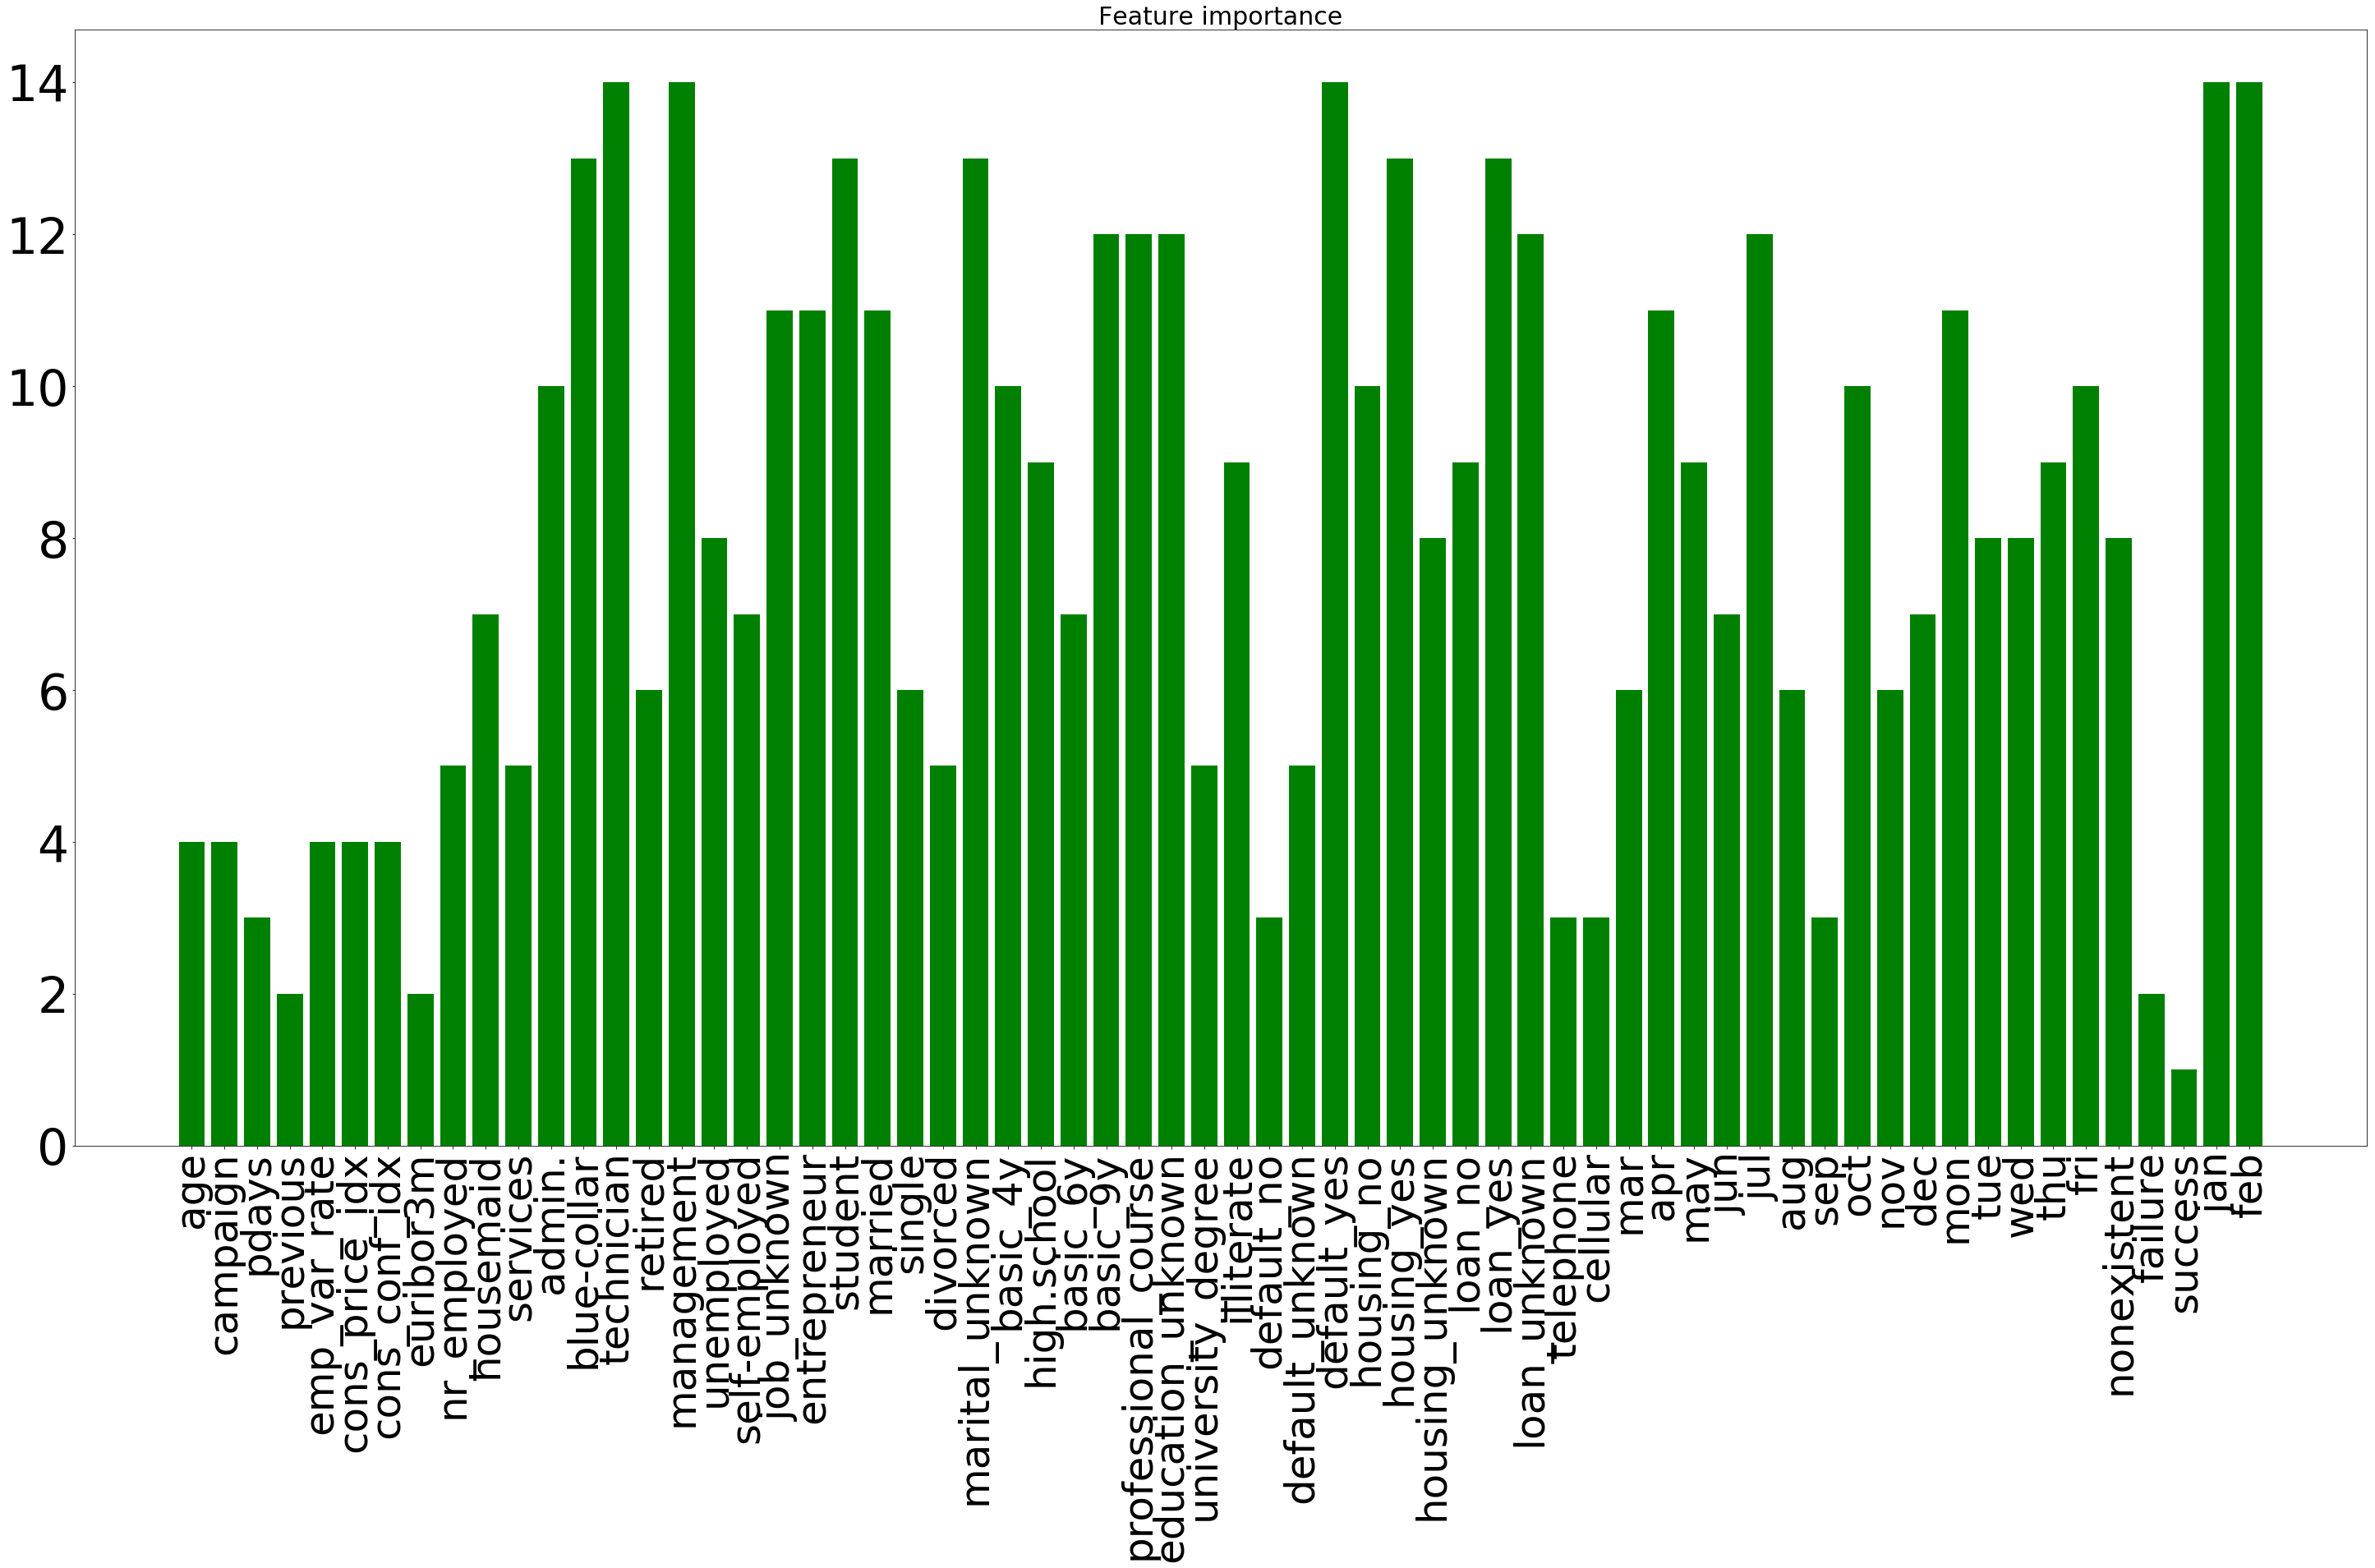

In [41]:
# plotFImp(graph, X_train)
params = {'axes.labelsize': 300,'axes.titlesize':30, 'text.fontsize': 20, 'legend.fontsize': 15, 'xtick.labelsize': 50, 'ytick.labelsize': 60}
plt.rcParams.update(params)
plt.figure(figsize=(50,25))
a = plt.bar(range(X_train.shape[1]), rfe_1.ranking_, color='green', align = 'center')
a = plt.title('Feature importance')
a = plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.show()

### Logistic

In [42]:
logistic =LogisticRegression()
rfe_logistic = RFECV(logistic,n_jobs=2,verbose=1,cv=10,step=5)

In [43]:
rfe_logistic = rfe_logistic.fit(X_train, y_train)

In [44]:
rfe_logistic.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False])

In [45]:
rfe_logistic.ranking_

array([12,  9,  8, 14,  7,  9,  8,  2, 12,  8,  5, 11, 13, 11,  3, 14,  5,
        3,  9,  9, 13,  7,  8,  9, 13,  6, 13,  5,  6, 13,  7, 10, 10,  4,
        7, 14, 11, 12, 10, 10, 12, 12, 11,  4,  3,  4,  5,  6,  7,  2,  2,
        3,  5,  8,  6,  4, 11, 10,  6,  3,  4,  1, 14, 14])

In [46]:
graph_2 =rfe_logistic.ranking_

C:\Users\gaurang\Anaconda3\lib\site-packages\matplotlib\__init__.py:800: MatplotlibDeprecationWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  mplDeprecation)


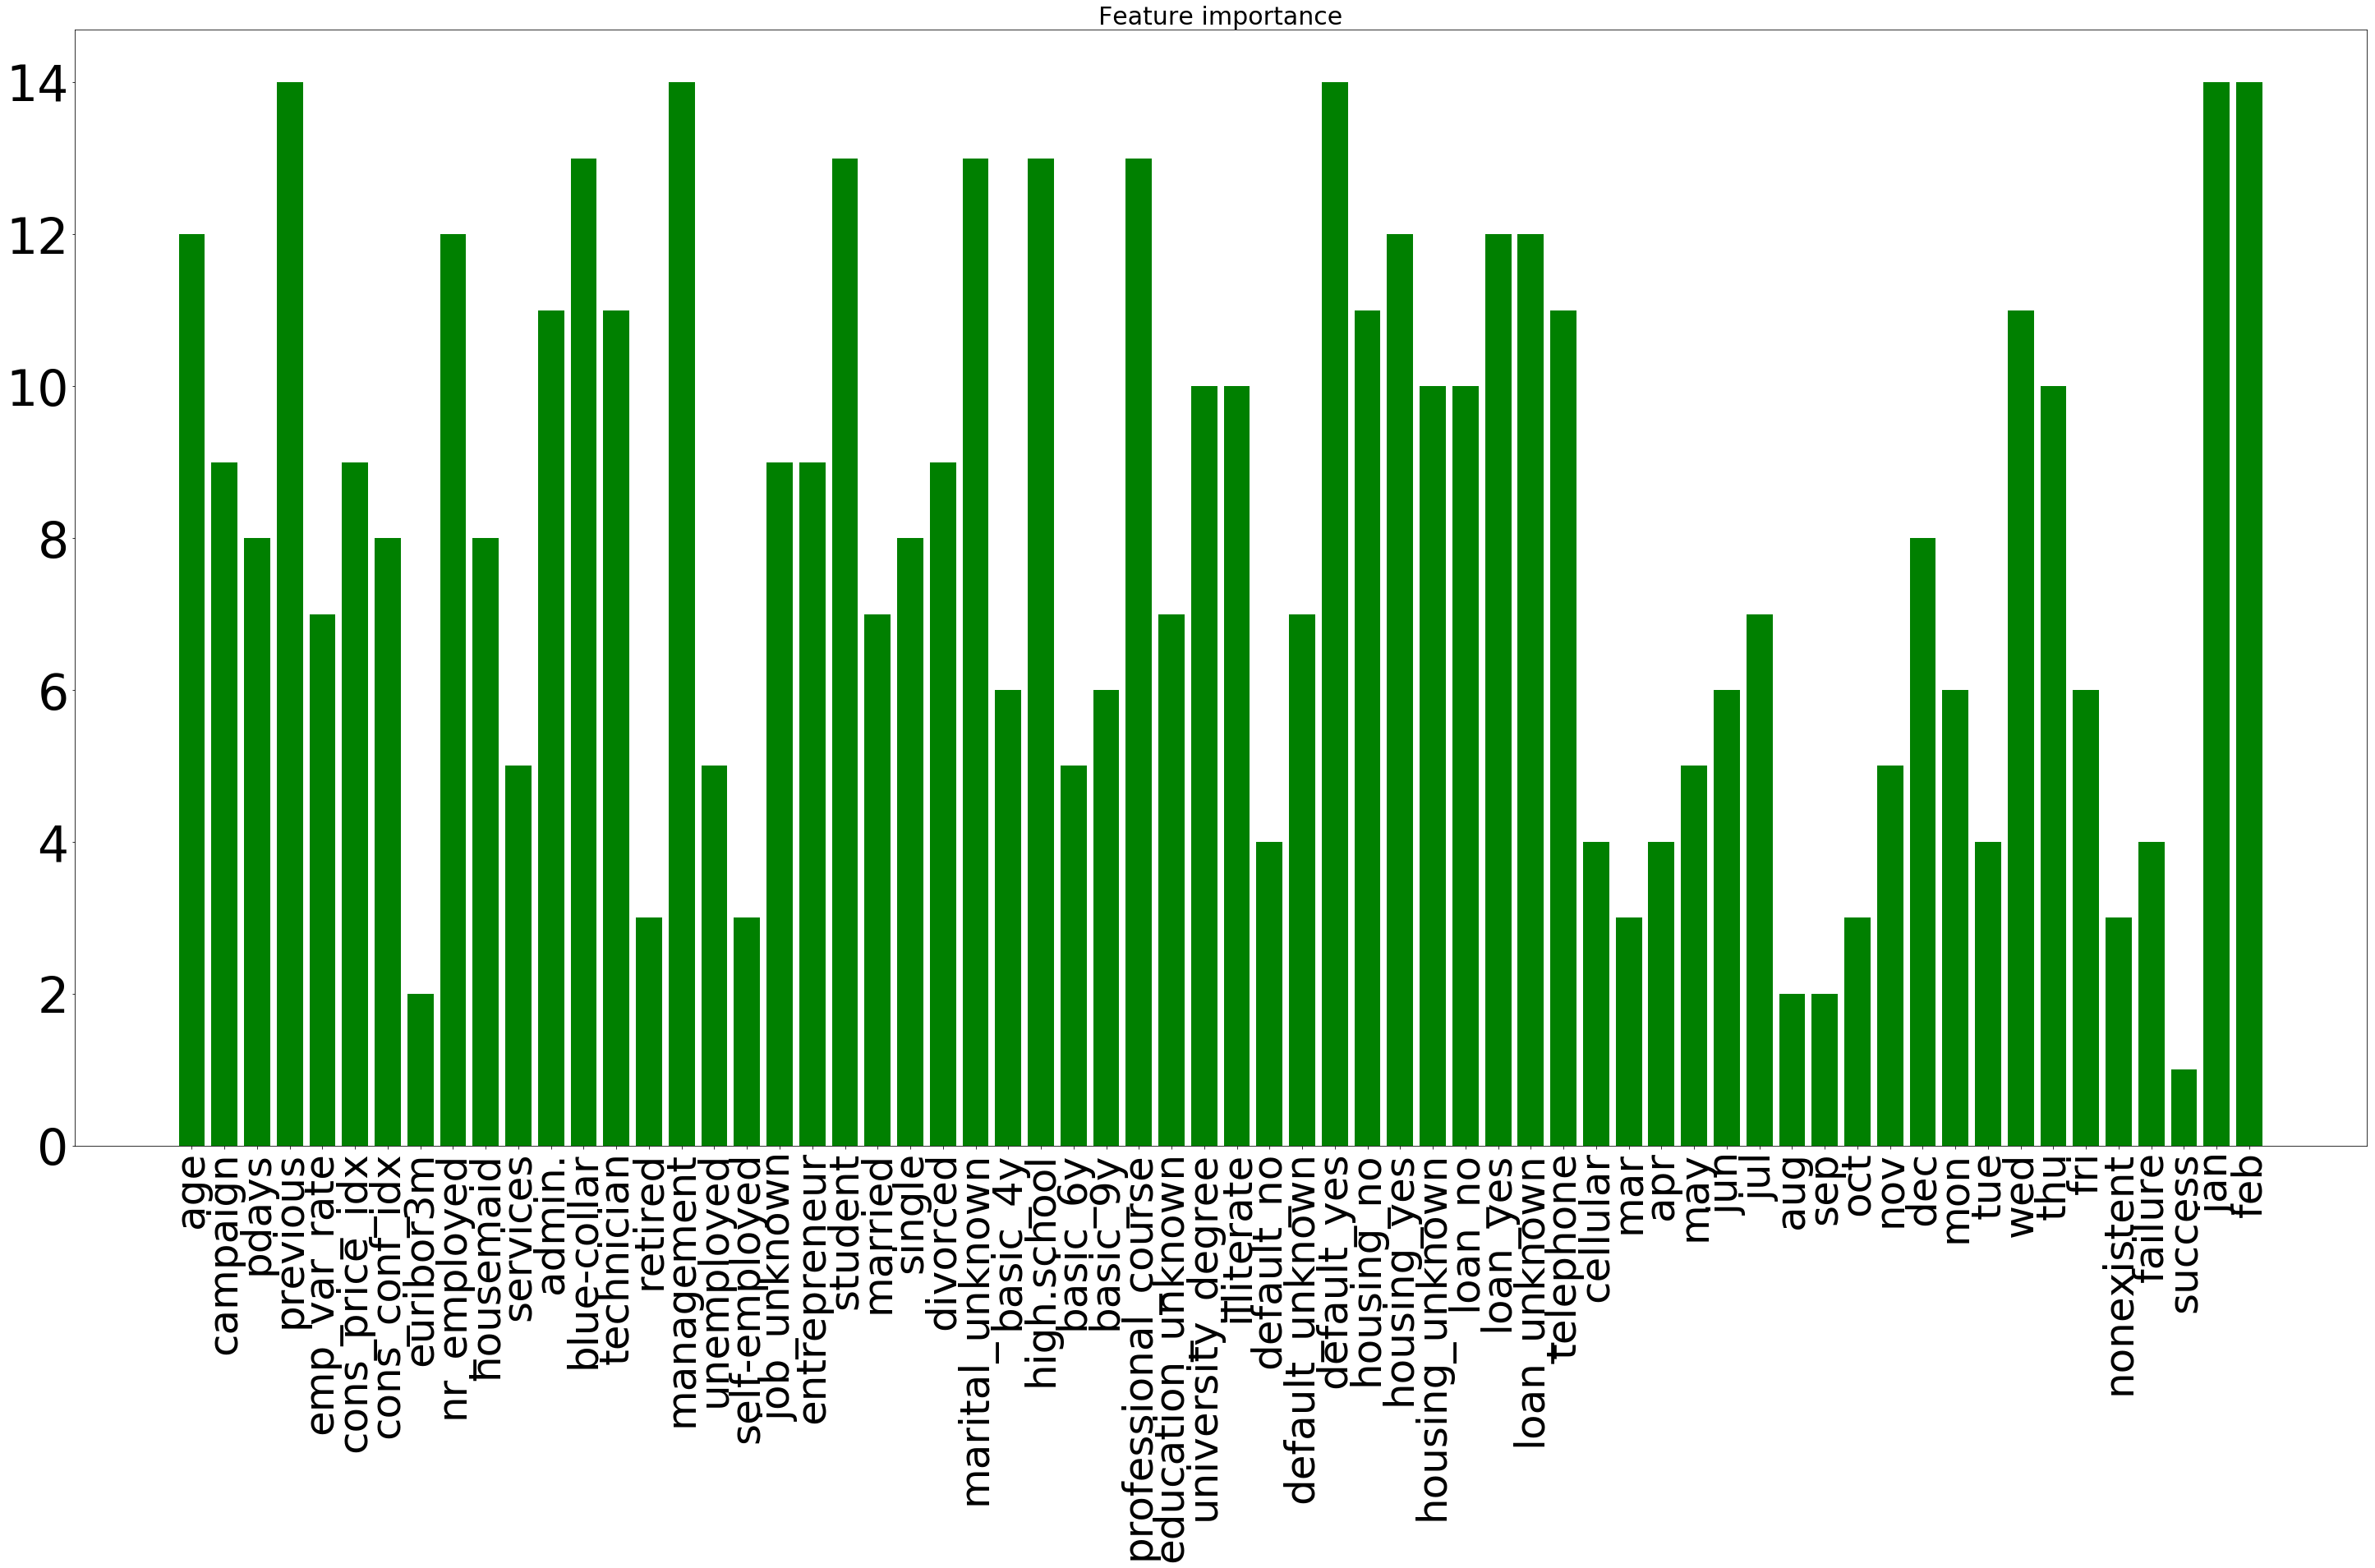

In [47]:
params = {'axes.labelsize': 300,'axes.titlesize':30, 'text.fontsize': 20, 'legend.fontsize': 15, 'xtick.labelsize': 50, 'ytick.labelsize': 60}
plt.rcParams.update(params)
plt.figure(figsize=(50,25))
a = plt.bar(range(X_train.shape[1]), graph_2, color='green', align = 'center')
a = plt.title('Feature importance')
a = plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.show()

## Feature Selection using Feature Importance (decision trees)

### ExtraTreesClassifier

In [48]:
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
importance = model.feature_importances_
importance

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

array([1.53644339e-01, 9.13574779e-02, 1.79126099e-02, 1.17010436e-02,
       2.60692303e-02, 1.68331861e-02, 2.78915930e-02, 1.14422570e-01,
       2.75203174e-02, 1.83755921e-02, 1.14291529e-02, 5.93092164e-03,
       4.27458365e-03, 9.79702634e-03, 8.67436108e-03, 6.02435460e-03,
       9.13752081e-03, 6.71176829e-03, 1.53357341e-02, 5.58958868e-03,
       2.57823254e-03, 1.12965888e-02, 1.75108178e-02, 1.54844189e-02,
       9.84415478e-04, 9.18721133e-03, 6.76106399e-03, 1.09865637e-02,
       1.65178104e-02, 2.37503658e-04, 1.26926630e-02, 1.59652768e-02,
       7.36093570e-03, 8.86801470e-03, 7.95037669e-03, 2.47873599e-06,
       2.09759609e-02, 2.54074953e-03, 2.07713973e-02, 1.49994388e-02,
       2.70482409e-03, 1.47000380e-02, 5.84176316e-03, 1.01006164e-02,
       4.79337631e-03, 2.67562534e-03, 1.95272365e-03, 3.42577910e-03,
       3.24163778e-03, 9.76192928e-03, 1.29602512e-02, 3.63608051e-03,
       6.27952993e-03, 2.39981171e-03, 1.46727936e-02, 1.46065797e-02,
      

C:\Users\gaurang\Anaconda3\lib\site-packages\matplotlib\__init__.py:800: MatplotlibDeprecationWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  mplDeprecation)


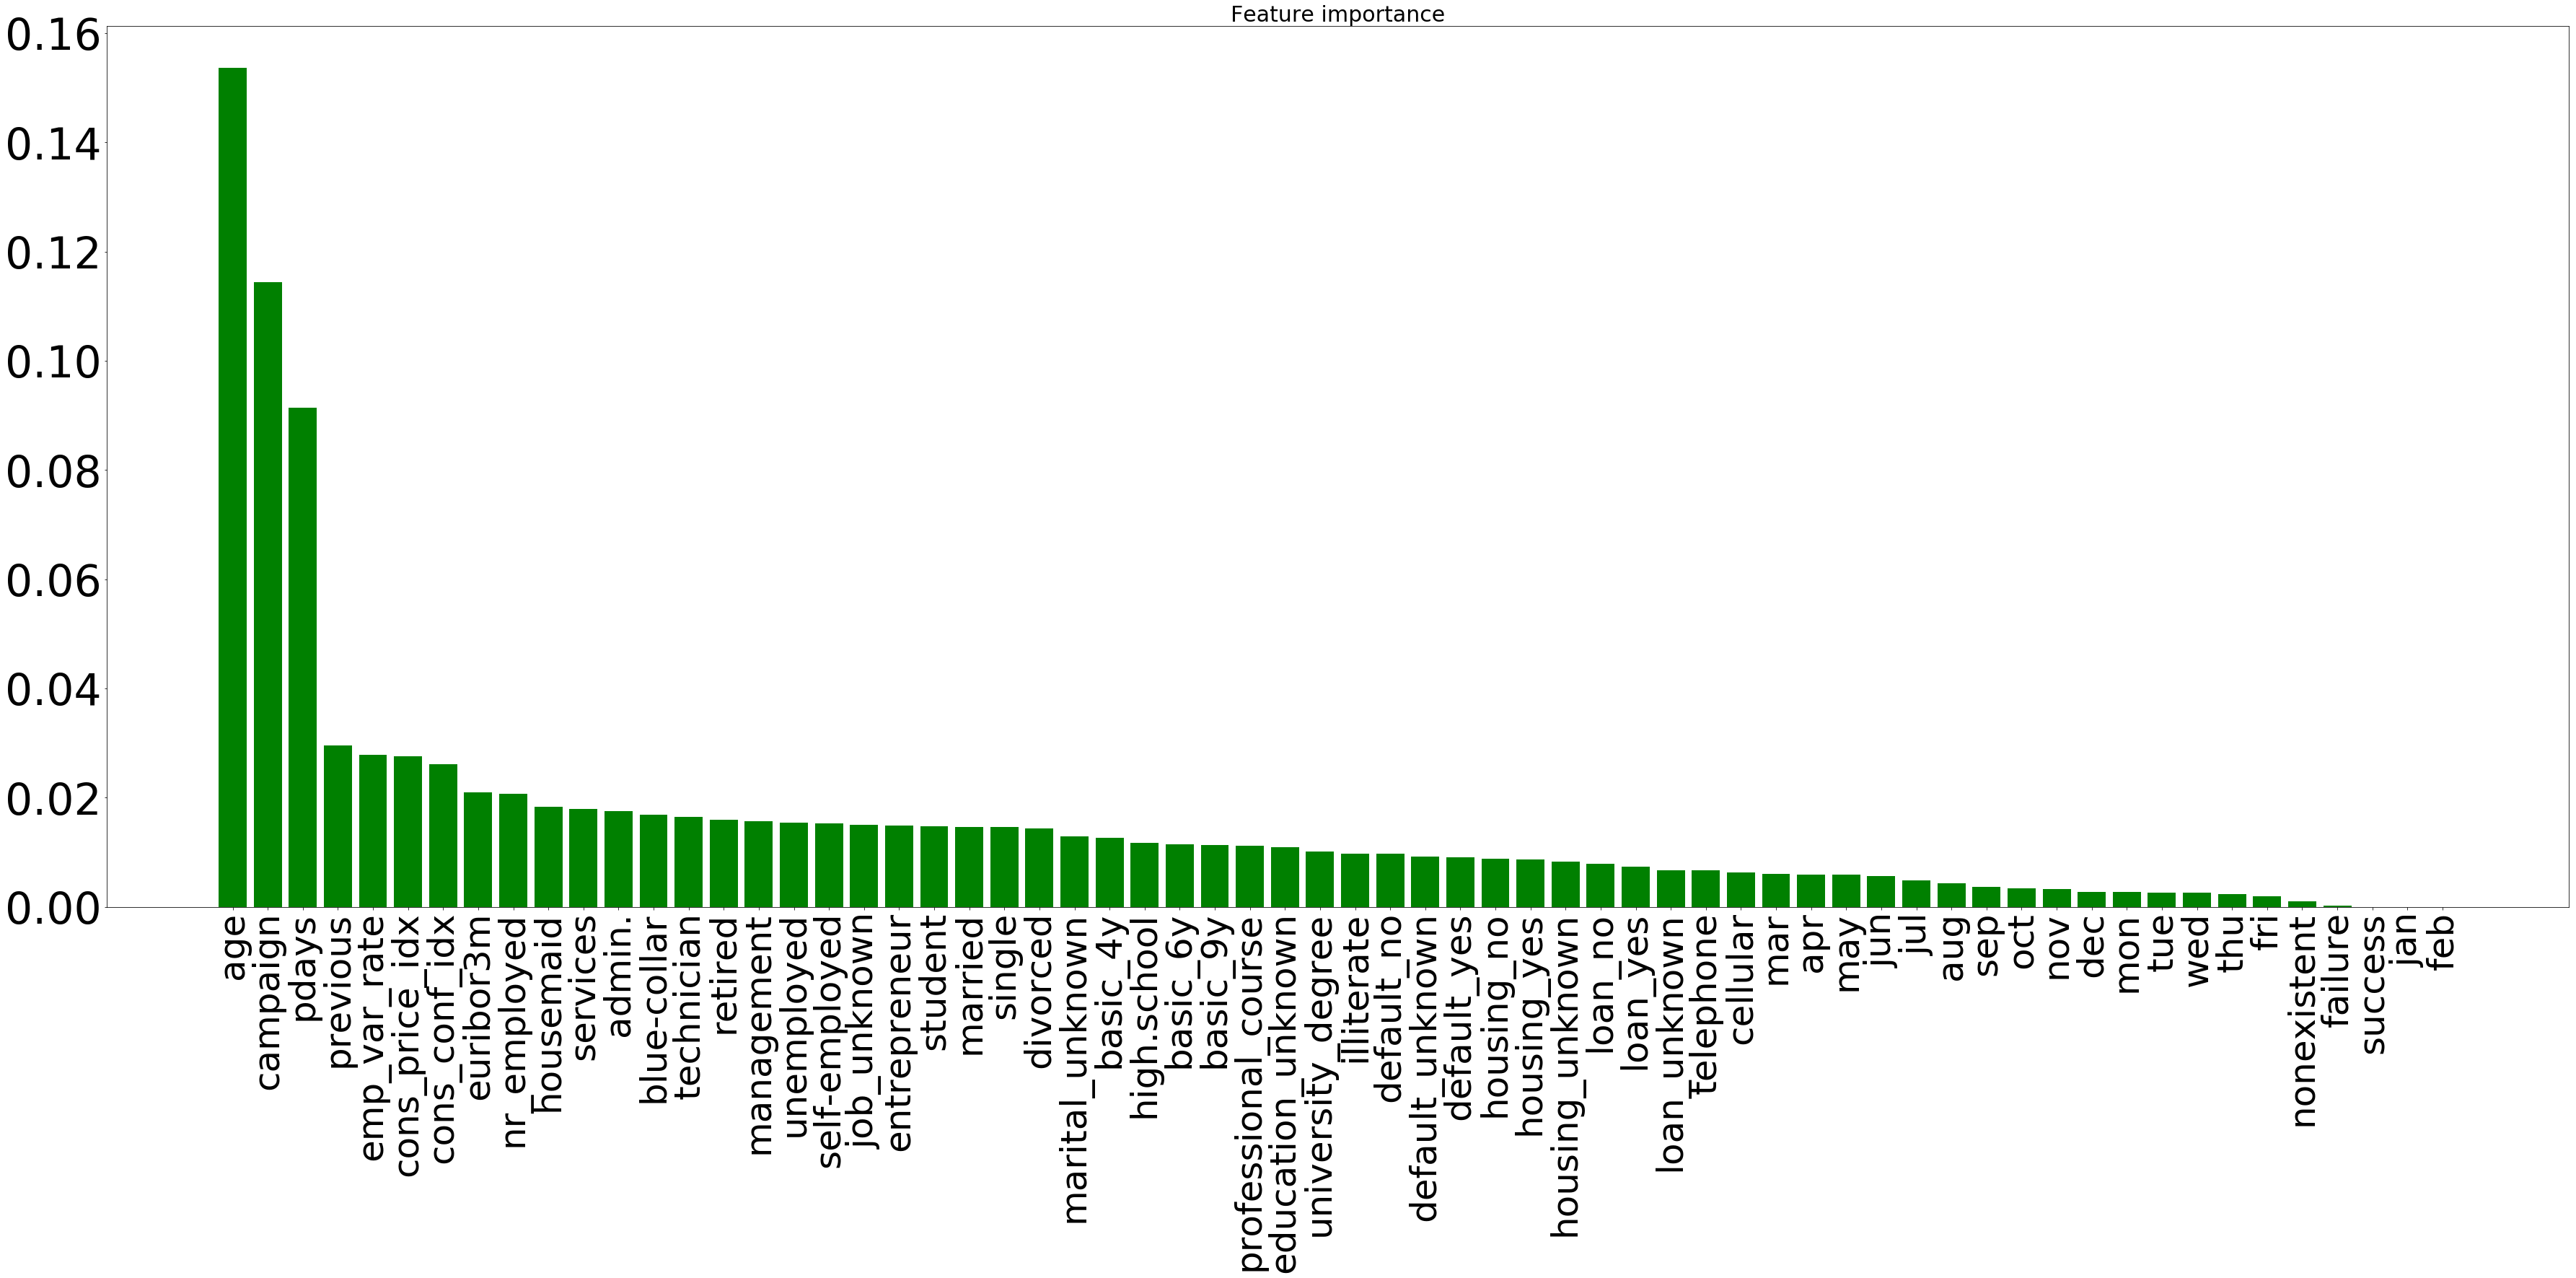

In [49]:
def plotFImp(importance, X_train):
    indices = np.argsort(importance)[::-1]
    plt.bar(range(X_train.shape[1]), importance[indices], color='green', align = 'center')
    plt.title('Feature importance')
    plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
    plt.tight_layout()
    plt.show()


plt.tight_layout()
params = {'axes.labelsize': 300,'axes.titlesize':30, 'text.fontsize': 20, 'legend.fontsize': 15, 'xtick.labelsize': 50, 'ytick.labelsize': 60}
plt.rcParams.update(params)
plt.figure(figsize=(50,25))
plotFImp(importance, X_train)


In [50]:
selected_columns = ['age', 'campaign', 'pdays', 'previous', 'emp_var_rate','nr_employed','housemaid','cons_price_idx', 'cons_conf_idx', 'euribor3m', 'result']

In [51]:
new_df_train = df_train[selected_columns]
new_df_test = df_test[selected_columns]
new_df_train.head()

,age,campaign,pdays,previous,emp_var_rate,nr_employed,housemaid,cons_price_idx,cons_conf_idx,euribor3m,result
0,56,1,0,0,1.1,5191.0,0.0,93.994,-36.4,4.857,0
1,57,1,0,0,1.1,5191.0,0.0,93.994,-36.4,4.857,0
2,37,1,0,0,1.1,5191.0,0.0,93.994,-36.4,4.857,0
3,40,1,0,0,1.1,5191.0,1.0,93.994,-36.4,4.857,0
4,56,1,0,0,1.1,5191.0,0.0,93.994,-36.4,4.857,0


In [52]:
new_df_train.to_csv("SelectedTrainData.csv")
new_df_test.to_csv("SelectedTestData.csv")